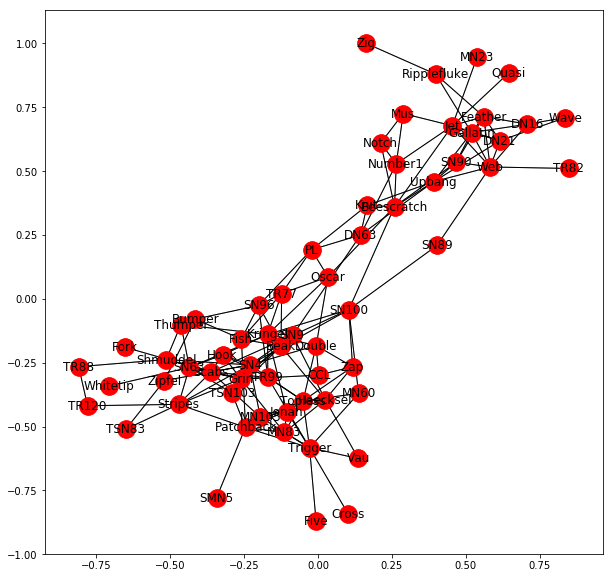

In [16]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

# 对网络G进行可视化
def plot_graph(G):
    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
#print(G)
#print(type(G))

# 可视化
plot_graph(G)
#print(list(G.nodes()))





feature_representations=
 {'Beak': array([0.00129733, 0.00169911]), 'Beescratch': array([0.00055907, 0.01360562]), 'Bumper': array([0.0022588 , 0.28857557]), 'CCL': array([0.00235392, 0.00607697]), 'Cross': array([0.00250714, 0.01279716]), 'DN16': array([0.00056736, 0.00268446]), 'DN21': array([0.00046229, 0.00240314]), 'DN63': array([0.08092457, 0.00318864]), 'Double': array([0.00203244, 0.0037108 ]), 'Feather': array([0.00029494, 0.00169908]), 'Fish': array([0.00155269, 0.03226002]), 'Five': array([0.00084752, 0.00955776]), 'Fork': array([0.00435305, 0.00010206]), 'Gallatin': array([0.00031893, 0.00186677]), 'Grin': array([0.00084762, 0.00254762]), 'Haecksel': array([0.0017996 , 0.00808026]), 'Hook': array([0.00037003, 0.00069852]), 'Jet': array([0.02384525, 0.0016104 ]), 'Jonah': array([0.00140522, 0.00830941]), 'Knit': array([0.08806332, 0.00262709]), 'Kringel': array([0.00186948, 0.00061419]), 'MN105': array([0.0009093 , 0.00680273]), 'MN23': array([0.00020411, 0.00029517]), 'MN60

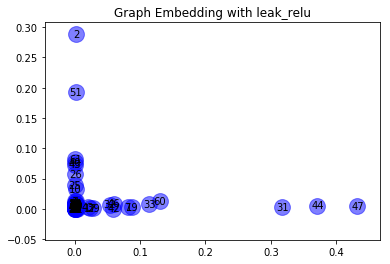

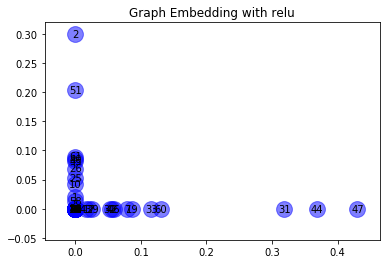

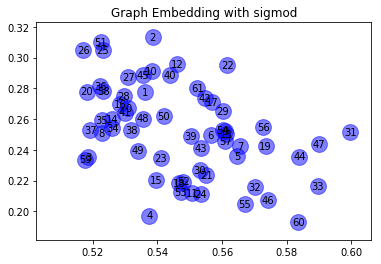

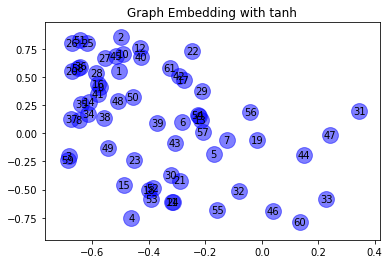

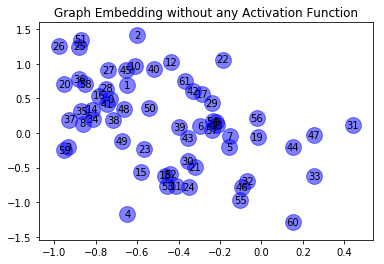

In [23]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
#print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
#print('A=\n', A) 

# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
#print('A_hat=\n', A_hat)

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
#print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
#print('D_hat=\n', D_hat)


# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
#print('W_1=\n', W_1)
#print('W_2=\n', W_2)


# x<0时 结果=0.01x; x>=0时，结果=x
def leaky_relu(x):
    return (0.505*abs(x)+0.495*x)

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
    return leaky_relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
#print('output=\n', output)
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)


# 绘制output，GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = 'blue',alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
#激活函数为Leaky_relu的结果
plot_node(output, 'Graph Embedding with leak_relu')
#激活函数为Reluc的结果

# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
plot_node(output, 'Graph Embedding with relu')

def sigmoid(x):
    return(np.exp(x)/(np.exp(x)+1))

def gcn_layer(A_hat, D_hat, X, W):
    return sigmoid(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
plot_node(output, 'Graph Embedding with sigmod')

def tanh(x):
    return((np.exp(2*x)-1)/(np.exp(2*x)+1))

def gcn_layer(A_hat, D_hat, X, W):
    return tanh(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
plot_node(output, 'Graph Embedding with tanh')

# 去掉激活函数后的结果
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
#print("output(去掉relu)=\n:",output)
plot_node(output, 'Graph Embedding without any Activation Function')
